In [10]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [16]:
url = 'https://www.imdb.com/title/tt0111161/reviews'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [21]:
lis = soup.select('div.text.show-more__control')
len(lis)

1472

In [19]:
for i in range(1, 41):
    driver.find_element(By.ID, 'load-more-trigger').click()
    time.sleep(3)

In [29]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
divs = soup.select('.content')
len(divs)

1472

In [30]:
div = divs[0]
revs = div.select('.text')
for rev in revs:
    print(rev.get_text())

The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn't give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the f

In [34]:
reviews = []
for div in divs:
    revs = div.select('.text')
    for rev in revs:
        reviews.append(rev.get_text())

In [35]:
reviews

['The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time th

In [36]:
with open('data/TSR.txt', 'w', encoding='utf-8') as f:
    for review in reviews:
        f.write(review + '\n')

In [38]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [47]:
sw_wc = STOPWORDS
print(sw_wc)

{"let's", 'any', 'off', "isn't", "hasn't", 'once', 'what', 'where', 'get', "mustn't", 'while', "couldn't", 'has', 'there', "we'll", 'and', "doesn't", 'however', 'further', "they'll", 'very', 'during', 'under', "we've", "i'll", 'this', 'all', "he'll", "how's", 'not', "they'd", 'no', 'they', 'those', 'would', "it's", "there's", 'she', "we'd", 'yours', 'being', "they're", 'each', "shan't", 'your', "that's", 'did', "i've", 'yourself', "didn't", 'ought', 'himself', 'more', 'on', 'here', 'few', 'or', "wouldn't", 'of', "don't", "i'd", 'their', 'just', 'below', 'from', 'com', 'other', 'him', "why's", 'am', 'over', 'his', 'my', 'themselves', 'hence', 'how', "he's", 'be', 'against', 'because', "you've", 'itself', 'herself', 'until', "shouldn't", 'were', "where's", "what's", 'if', 'ever', 'do', 'that', 'at', 'otherwise', 'should', 'me', 'been', 'therefore', 'an', 'above', 'between', 'could', 'ours', "haven't", 'then', 'by', 'down', "when's", 'does', "you're", "wasn't", 'when', 'like', 'http', "we

In [65]:
sw_wc.add('movie')
sw_wc.add('film')
sw_wc.add('one')

In [60]:
with open('data/TSR.txt') as f:
    text = f.read()

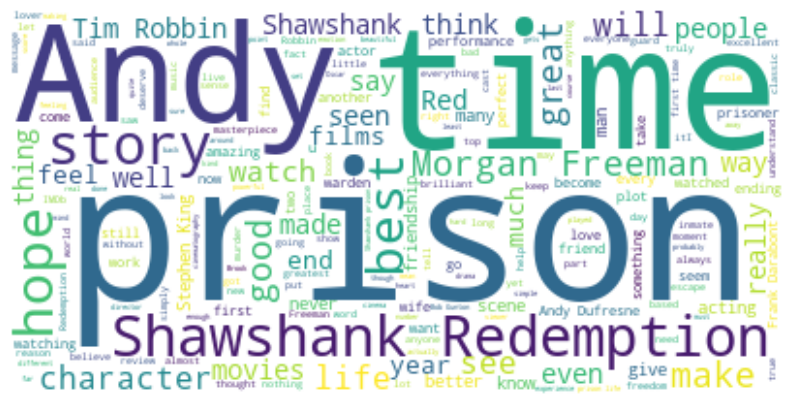

In [61]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [62]:
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

prison:	1.0
time:	0.9888776541961577
Andy:	0.9565217391304348
Shawshank Redemption:	0.80788675429727
story:	0.7896865520728008
hope:	0.737108190091001
best:	0.6329625884732053
Morgan Freeman:	0.6268958543983822
good:	0.6238624873609707
great:	0.6016177957532861


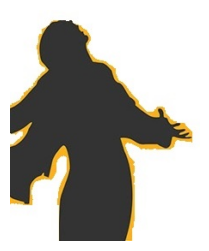

In [72]:
mask = np.array(Image.open('data/Shawshank Redemption.jpg'))
plt.figure(figsize=(5,3))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

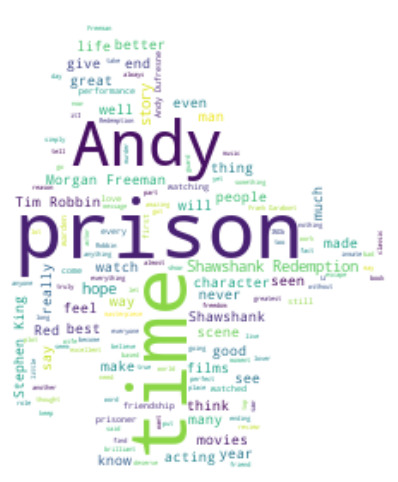

In [75]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc, mask=mask).generate(text)
plt.figure(figsize=(6,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');